In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import collections

In [2]:
data = pd.read_csv('C:/Users/shiny/OneDrive/Desktop/RASFF 2021-2024.csv', sep=';', 
                   header=0, index_col = 0) #encoding='latin-1')

In [3]:
mask = (data['DATE_CASE'] >= '2024-01-01') & (data['DATE_CASE'] <= '2024-05-15')
data2024 = data.loc[mask]

In [4]:
mask = (data['DATE_CASE'] >= '2023-01-02') & (data['DATE_CASE'] <= '2023-12-29')
data2023 = data.loc[mask]

In [5]:
mask = (data['DATE_CASE'] >= '2022-01-03') & (data['DATE_CASE'] <= '2022-12-30')
data2022 = data.loc[mask]

In [6]:
data2022['DATE_CASE'] = pd.to_datetime(data2022['DATE_CASE'])  # Assuming 'DATE_CASE' is a string column
chart = data2022.groupby(data2022.DATE_CASE.dt.month).size()

C:\Users\shiny\AppData\Local\Temp\ipykernel_14296\2419707369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2022['DATE_CASE'] = pd.to_datetime(data2022['DATE_CASE'])  # Assuming 'DATE_CASE' is a string column


DATE_CASE
1    32
2    37
3    68
4    38
5    42
dtype: int64


<Axes: title={'center': 'Month alerts (2022)'}, xlabel='DATE_CASE', ylabel='Number of alerts'>

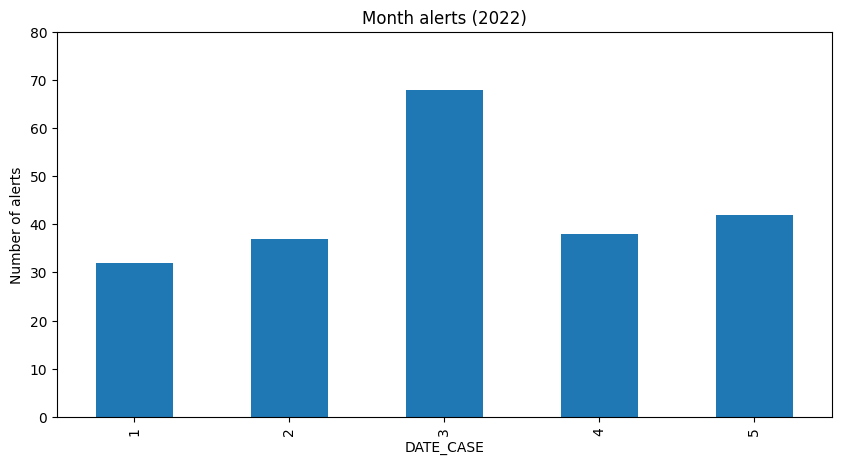

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
axes = plt.gca()
axes.set_ylim([0,80])
chart = data2022.groupby(data2022.DATE_CASE.dt.month).size() .drop(labels=[6,7, 8,9,10,11,12])
plt.xlabel('Months')
plt.ylabel('Number of alerts')
print(chart)
chart.plot.bar(figsize= (10,5),title='Month alerts (2022)')

In [8]:
data2023['DATE_CASE'] = pd.to_datetime(data2023['DATE_CASE'])  # Assuming 'DATE_CASE' is a string column
chart = data2023.groupby(data2023.DATE_CASE.dt.month).size()

C:\Users\shiny\AppData\Local\Temp\ipykernel_14296\2518027787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2023['DATE_CASE'] = pd.to_datetime(data2023['DATE_CASE'])  # Assuming 'DATE_CASE' is a string column


DATE_CASE
1    32
2    59
3    44
4    38
5    71
dtype: int64


<Axes: title={'center': 'Month alerts (2023)'}, xlabel='DATE_CASE', ylabel='Number of alerts'>

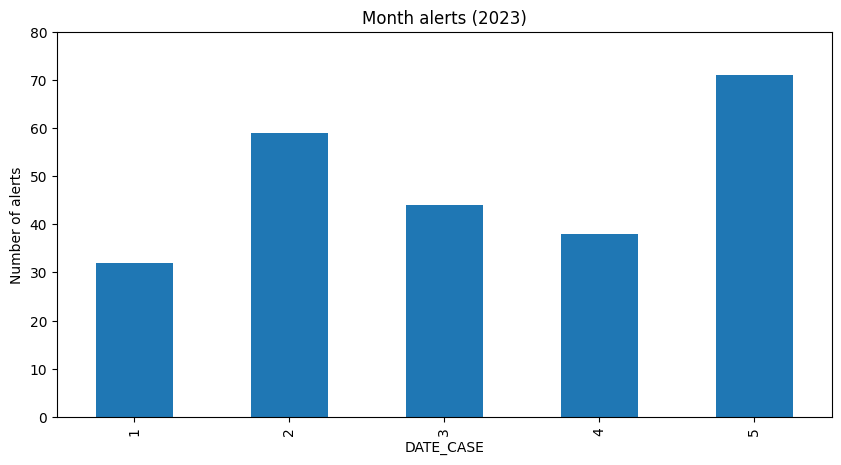

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
axes = plt.gca()
axes.set_ylim([0,80])
chart = data2023.groupby(data2023.DATE_CASE.dt.month).size() .drop(labels=[6,7, 8,9,10,11,12])
plt.xlabel('Months')
plt.ylabel('Number of alerts')
print(chart)
chart.plot.bar(figsize= (10,5),title='Month alerts (2023)')

In [11]:
data2024['DATE_CASE'] = pd.to_datetime(data2024['DATE_CASE'])  # Assuming 'DATE_CASE' is a string column
chart = data2024.groupby(data2024.DATE_CASE.dt.month).size()

C:\Users\shiny\AppData\Local\Temp\ipykernel_14296\2149940444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2024['DATE_CASE'] = pd.to_datetime(data2024['DATE_CASE'])  # Assuming 'DATE_CASE' is a string column


DATE_CASE
1    46
2    52
3    68
4    77
5    32
dtype: int64


<Axes: title={'center': 'Month alerts (2024)'}, xlabel='DATE_CASE', ylabel='Number of alerts'>

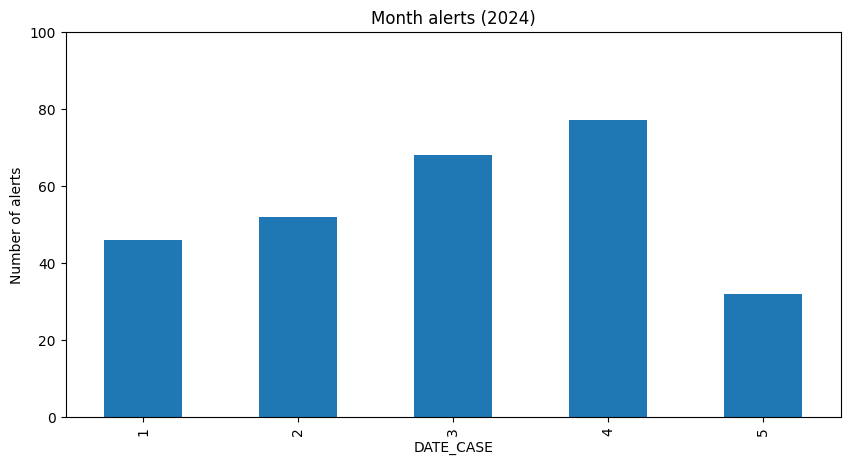

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
axes = plt.gca()
axes.set_ylim([0,100])
chart = data2024.groupby(data2024.DATE_CASE.dt.month).size() #.drop(labels=[8,9,10,11,12])
plt.xlabel('Months')
plt.ylabel('Number of alerts')
print(chart)
chart.plot.bar(figsize= (10,5),title='Month alerts (2024)')

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset and ensure 'DATE_CASE' is in datetime format
data = pd.read_csv('C:/Users/shiny/OneDrive/Desktop/RASFF 2021-2024.csv', sep=';', header=0, index_col=0, encoding='latin-1')
data['DATE_CASE'] = pd.to_datetime(data['DATE_CASE'], format='%Y-%m-%d', errors='coerce')


# Now handle the resampling for the entire date range, from 2022 to mid-2024

# Group by the full dataset for the DATE_CASE values
time_alerts = data.groupby('DATE_CASE').size()

# Create a continuous date range from January 2022 to May 2024
idx = pd.date_range('2022-01-01', '2024-05-15')

# Reindex the time_alerts to ensure all dates are covered, fill missing days with 0
time_alerts = time_alerts.reindex(idx, fill_value=0)

# Convert to DataFrame for further processing
time_alerts = time_alerts.to_frame(name='day_alerts')
time_alerts.index.name = 'date'

# Resample to get monthly sum of alerts
time_alerts['month_alerts'] = time_alerts['day_alerts'].resample('M').sum()

# Keep only rows where 'month_alerts' are not null
month_serie = time_alerts[time_alerts['month_alerts'].notnull()]

# Drop the 'day_alerts' column and flatten the monthly alert values into an array
month_serie = month_serie.drop(['day_alerts'], axis=1)
month_serie_array = month_serie['month_alerts'].values.flatten()

# Print the monthly series array
print(month_serie_array)


[32. 37. 68. 38. 42. 40. 55. 38. 39. 48. 47. 59. 32. 59. 44. 38. 71. 50.
 51. 60. 48. 63. 61. 37. 46. 52. 68. 77.]


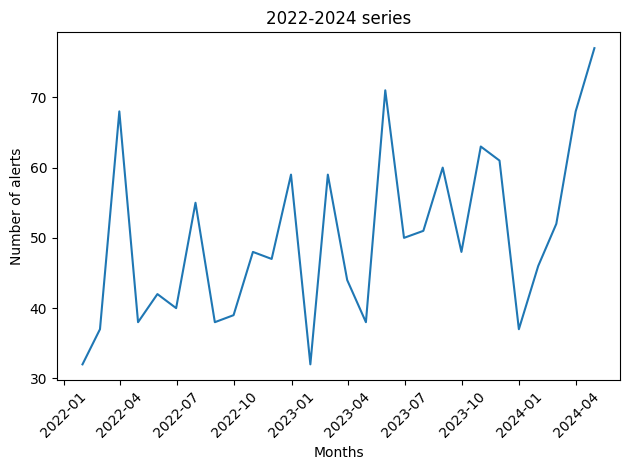

In [15]:
plt.plot(month_serie)
plt.title('2022-2024 series')
plt.xlabel('Months')
plt.ylabel('Number of alerts')
plt.xticks(rotation=45)  # Rotates the x-axis labels by 45 degrees
plt.tight_layout()  # Adjusts the layout to prevent clipping
plt.show()
